In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('SalaryData.csv')

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.tail()

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


In [5]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [7]:
df.Education=pd.Categorical(df.Education)


In [8]:
df.Education.value_counts

<bound method IndexOpsMixin.value_counts of 0      Doctorate
1      Doctorate
2      Doctorate
3      Doctorate
4      Doctorate
5      Doctorate
6      Doctorate
7      Doctorate
8      Doctorate
9      Doctorate
10     Doctorate
11     Doctorate
12     Doctorate
13     Doctorate
14     Doctorate
15     Bachelors
16     Bachelors
17     Bachelors
18     Bachelors
19     Bachelors
20     Bachelors
21     Bachelors
22     Bachelors
23     Bachelors
24     Bachelors
25     Bachelors
26       HS-grad
27       HS-grad
28       HS-grad
29       HS-grad
30       HS-grad
31       HS-grad
32       HS-grad
33       HS-grad
34       HS-grad
35     Bachelors
36     Bachelors
37     Bachelors
38     Bachelors
39     Doctorate
Name: Education, dtype: category
Categories (3, object): [' Bachelors', ' Doctorate', ' HS-grad']>

In [9]:
df.Occupation=pd.Categorical(df.Occupation)

In [10]:
df.Occupation.value_counts

<bound method IndexOpsMixin.value_counts of 0         Adm-clerical
1         Adm-clerical
2         Adm-clerical
3         Adm-clerical
4                Sales
5                Sales
6                Sales
7                Sales
8                Sales
9       Prof-specialty
10      Prof-specialty
11      Prof-specialty
12      Prof-specialty
13      Prof-specialty
14      Prof-specialty
15        Adm-clerical
16        Adm-clerical
17        Adm-clerical
18      Prof-specialty
19      Prof-specialty
20      Prof-specialty
21      Prof-specialty
22               Sales
23               Sales
24               Sales
25               Sales
26               Sales
27               Sales
28               Sales
29        Adm-clerical
30        Adm-clerical
31        Adm-clerical
32      Prof-specialty
33      Prof-specialty
34      Prof-specialty
35     Exec-managerial
36     Exec-managerial
37     Exec-managerial
38     Exec-managerial
39     Exec-managerial
Name: Occupation, dtype: category
Ca

In [11]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [12]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [13]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09   2.284576  9.648715e-02
C(Education)    2.0  9.695663e+10  4.847831e+10  29.510933  3.708479e-08
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

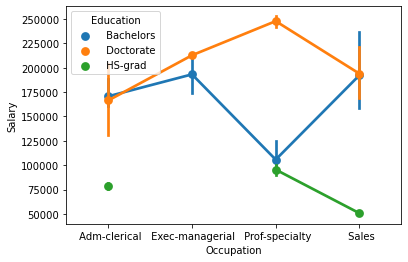

In [14]:
sns.pointplot(data=df,x='Occupation', y='Salary', hue='Education')

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

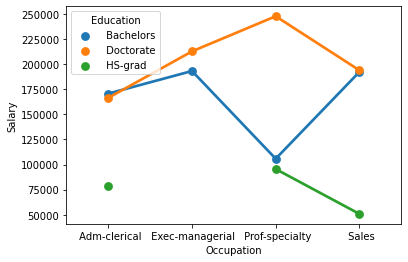

In [15]:
sns.pointplot(data=df,x='Occupation', y='Salary', hue='Education', ci=None)